In [117]:
import pandas as pd

def clean_survey_data(file='CSCI_1070_survey_results.csv'):
    df_class = pd.read_csv(file)
    
    column_mapping = {
        'What state/country were you born in?': 'country_of_origin',
        'How many pets and of which kind do you have?': 'amount_of_pets',
        'What is your favorite type of food?': 'favorite_food_type',
        'What is your major?': 'major',
        'How old are you?': 'age'
    }
    df_class.rename(columns=column_mapping, inplace=True)
    
    df_class.replace({'\'': '', '-': '', '\.': '', '\,': '','\—': ''}, regex=True, inplace=True)
    
    country_replacements = {
        'Missouri': 'US',
        'Missouri/US': 'US',
        'United States Missouri': 'US',
        'Saint Louis Missouri': 'US',
        'Illinois': 'US',
        'United States': 'US',
        'Minnesota': 'US',
        'New Mexico': 'US',
        'Georgia USA': 'US',
        'Benghazi Libya': 'Libya'
    }
    df_class['country_of_origin'] = df_class['country_of_origin'].replace(country_replacements)
    
    pets_replacements = {
        'My french bulldog just passed away a few months ago': 0,
        'No pets': 0,
        'No pets ': 0,
        'none': 0,
        'NaN': 0,
        'nan': 0,
        'None ):': 0,  
        'None': 0,
        'We have a Husky named Maverick': 1,
        '1 Maincoon': 1,
        'I have two golden retrievers Ellie and Amber Ellie is ten years young and everything good about life Amber is two and scared of everything (foster) but Ellies teaching her that thingseven plastic bagsare okay': 2,
        'I have two dogs both chihuahua mixes': 2,
        '2 miniature daschund dogs': 2,
        '2 cats and 1 dog ': 3,
    }
    df_class['amount_of_pets'] = df_class['amount_of_pets'].replace(pets_replacements)
    
    food_type_replacements = {
        'Pasta': 'Italian',
        'PASTAAAAA': 'Italian',
        'Pasta but fish is a close second' : 'Italian', 
        'pasta': 'Italian',
        'Hot wings' : 'American', 
        'some sort of steak probably a filet mignon' : 'American', 
        'Burgers (blue cheese)' : 'American', 
        'grilled chicken' : 'American',
        'salmon' : 'American',
        'Pizza or Steak' : 'American',
        'Brownies' : 'American',
        'Mexican.': 'Mexican',
        'injera': 'Ethiopian',
        'Kabsa ': 'Middle Eastern',
        'Gambian Food': 'Gambian',
        'mexican/middleastern': 'More than one favorite',
        'I dont have a favorite': 'None',
    }
    df_class['favorite_food_type'] = df_class['favorite_food_type'].replace(food_type_replacements)
    
    major_replacements = {
        'comp sci':'Computer Science',
        'It was pre medicine therefore biology but I decided to switch over to computer science because I did not want to endure the tedious amounts of schooling to be a physician and I find software programming to be cool and the future':'Computer Science',
        'computer science': 'Computer Science',
        'Computer Sci':'Computer Science',
        'Economics and Finance':'More than one major',
        'Criminology and Criminal Justice and I am planing to have a minor in CS' :'More than one major',
        'International Business (Graduated)':'International Business',
        'data science':'Data Science',
        'Data Science':'Data Science'
    }
    df_class['major'] = df_class['major'].replace(major_replacements)
    
    age_replacements = {
        '18 years old': 18,
        '19 turning 20 on February 28': 19
    }
    df_class['age'] = df_class['age'].replace(age_replacements)
    
    cleaned_columns = ['country_of_origin', 'amount_of_pets', 'favorite_food_type', 'major', 'age']
    return df_class[cleaned_columns]

cleaned_data = clean_survey_data()
cleaned_data

<>:15: SyntaxWarning: invalid escape sequence '\.'
<>:15: SyntaxWarning: invalid escape sequence '\,'
<>:15: SyntaxWarning: invalid escape sequence '\.'
<>:15: SyntaxWarning: invalid escape sequence '\,'
/var/folders/mf/w0q0hwpx6_g6f6s9gpkk33z00000gn/T/ipykernel_51850/2208414576.py:15: SyntaxWarning: invalid escape sequence '\.'
  df_class.replace({'\'': '', '-': '', '\.': '', '\,': '','\—': ''}, regex=True, inplace=True)
/var/folders/mf/w0q0hwpx6_g6f6s9gpkk33z00000gn/T/ipykernel_51850/2208414576.py:15: SyntaxWarning: invalid escape sequence '\,'
  df_class.replace({'\'': '', '-': '', '\.': '', '\,': '','\—': ''}, regex=True, inplace=True)


,country_of_origin,amount_of_pets,favorite_food_type,major,age
0,US,2,Italian,Data Science,18
1,US,0,American,Nursing,19
2,US,2,Mexican,More than one major,19
3,US,0,Vietnamese,Biochemistry,18
4,Japan,0,Italian,Health Sciences,18
5,US,0,Ethiopian,Computer Science,19
6,US,0,Italian,Computer Science,18
7,Saudi Arabia,0,Middle Eastern,More than one major,NaN
8,US,0,Gambian,Computer Science,18
9,India,NaN,Italian,Finance,21


In [9]:
pip install matplotlib


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: /usr/local/Cellar/jupyterlab/4.0.10/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


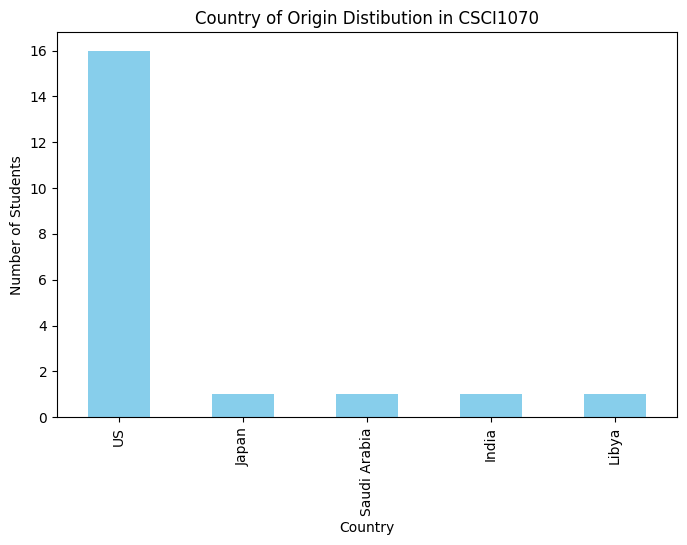

In [122]:
from matplotlib import pyplot as plt

countries_class_count = df_class['country_of_origin'].value_counts()

plt.figure(figsize=(8, 5))
countries_class_count.plot(kind='bar', color='skyblue')
plt.title('Country of Origin Distibution in CSCI1070')
plt.xlabel('Country')
plt.ylabel('Number of Students')
plt.show()

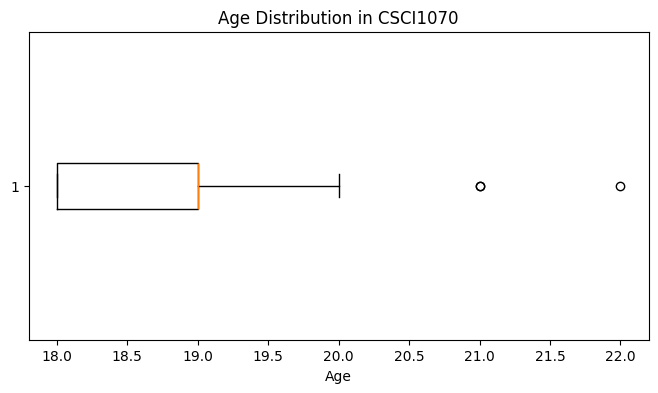

In [121]:
import matplotlib.pyplot as plt

age_distribution = pd.to_numeric(df_class['age'], errors='coerce').dropna()

plt.figure(figsize=(8, 4))
plt.boxplot(age_distribution, vert=False)
plt.title('Age Distribution in CSCI1070')
plt.xlabel('Age')
plt.show()

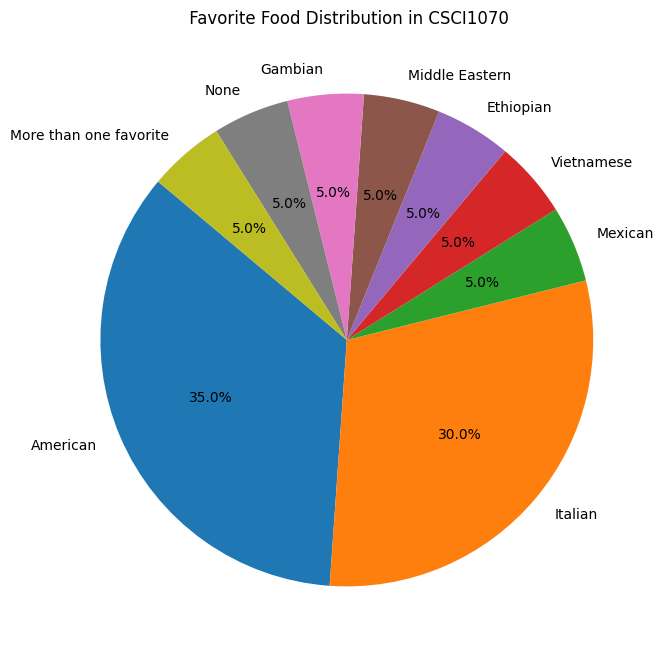

In [120]:
import matplotlib.pyplot as plt

favorite_food_distribution = df_class['favorite_food_type'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(favorite_food_distribution, labels=favorite_food_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title(' Favorite Food Distribution in CSCI1070')
plt.show()


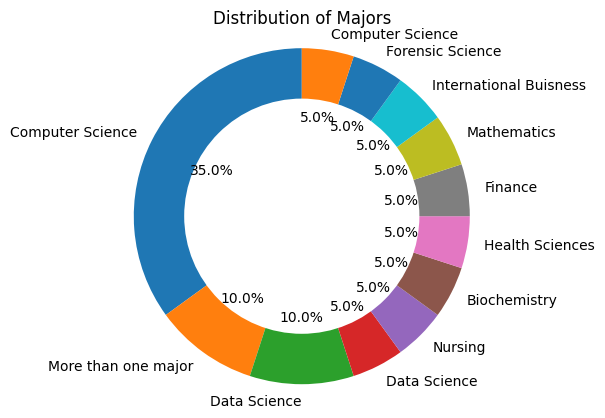

In [119]:
import matplotlib.pyplot as plt
import pandas as pd

major_distribution = df_class['major'].value_counts()

# Create a donut chart
fig, ax = plt.subplots()
ax.pie(major_distribution, labels=major_distribution.index, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4))

# Draw a white circle at the center to create a donut chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')  

plt.title('Distribution of Majors')
plt.show()

/var/folders/mf/w0q0hwpx6_g6f6s9gpkk33z00000gn/T/ipykernel_51850/2203613843.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_class['amount_of_pets'].fillna('0', inplace=True)


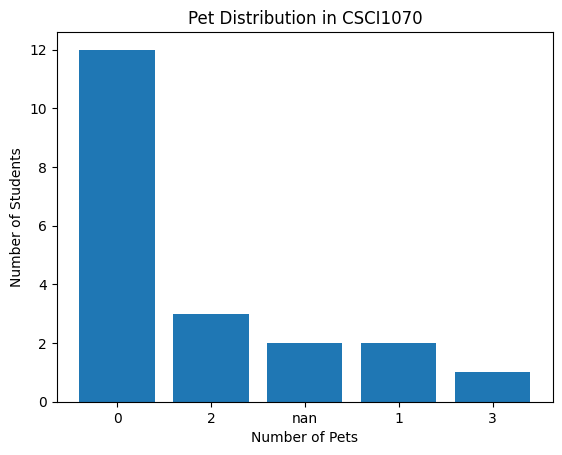

In [118]:
import pandas as pd
import matplotlib.pyplot as plt


import matplotlib.pyplot as plt
import pandas as pd


df_class['amount_of_pets'] = df_class['amount_of_pets'].astype(str)

df_class['amount_of_pets'].fillna('0', inplace=True)

pets_distribution = df_class['amount_of_pets'].value_counts()

pets_distribution = pets_distribution.reindex(['0'] + pets_distribution.index.tolist())


plt.bar(pets_distribution.index, pets_distribution.values)
plt.xlabel('Number of Pets')
plt.ylabel('Number of Students')
plt.title('Pet Distribution in CSCI1070')

plt.show()


